#**Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#**Business Understanding**

##**Business Objective**

Dataset Salary_Data

Data ini merupakan sebuah data gaji pekerja yang diambil dari berbagai sumber seperti survey, situs lowongan kerja, dan sumber publik lainnya. Tujuan dari analisis ini adalah untuk memahami faktor-faktor apa saja yang dapat memengaruhi gaji seorang pekerja.

Di dalam dataset ini terdapat 6704 baris dan 6 kolom.

##**Assess Situation**

Kondisi dari dataset ini memiliki empat variabel (umur, tingkat pendidikan terakhir, posisi jabatan, dan pengalaman) yang dapat memengaruhi besar gaji yang didapatkan oleh sebuah pekerja.

Karena dataset ini mencakup variabel yang banyak, maka butuh pemahaman dan proses analisis yang lebih dalam.

##**Analytic Goals & Project Plan**

Untuk mengatasi masalah berikut, di dalam dataset ini akan dilakukan:

*   Analisis faktor-faktor penentu gaji
*   Penentuan variabel yang paling dominan dalam memengaruhi gaji
*   Menyajikan data dalam bentuk visualisasi

#**Data Understanding**

##**Memuat Dataset**

In [ ]:
file = "/content/drive/MyDrive/AVD praktikum1/Salary_Data.csv"
df = pd.read_csv(file)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


##**Struktur Data (Informasi Lanjutan)**

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
df.shape

(6704, 6)

##**Informasi Statistik Deskriptif**

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


*Count* itu menghitung baris. Karena total seluruh baris 6704, ketiga kolom Age, Years of Experience, dan Salary memiliki missing values.

*Mean* menghitung rata-rata (total semua data/jumlah data).

*25%, 50%,* dan *75%* menghitung nilai kuartil 1, kuartil 2, kuartil 3.

*Min* merupakan nilai terkecil dari kolom data, dan *Max* merupakan nilai terbesar.

In [ ]:
df.value_counts()

Age   Gender  Education Level    Job Title                  Years of Experience  Salary  
24.0  Female  High School        Receptionist               0.0                  25000.0     45
32.0  Male    Bachelor's Degree  Product Manager            7.0                  120000.0    45
27.0  Male    Bachelor's Degree  Software Engineer          3.0                  80000.0     45
32.0  Male    Bachelor's         Software Engineer          8.0                  190000.0    39
33.0  Female  Master's           Product Manager            11.0                 198000.0    38
                                                                                             ..
23.0  Male    High School        Sales Executive            1.0                  35000.0      1
              PhD                Software Engineer Manager  1.0                  579.0        1
54.0  Male    PhD                Software Engineer Manager  28.0                 182013.0     1
23.0  Male    Bachelor's         Data Analyst               1.0                  92000.0      1
                                                                                 95000.0      1
Name: count, Length: 1787, dtype: int64

In [ ]:
df.mean(numeric_only=True)

,0
Age,33.620859
Years of Experience,8.094687
Salary,115326.964771


In [ ]:
df.median(numeric_only=True)

,0
Age,32.0
Years of Experience,7.0
Salary,115000.0


In [ ]:
df.std(numeric_only=True)

,0
Age,7.614633
Years of Experience,6.059003
Salary,52786.183911


In [ ]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.937655,0.728053
Years of Experience,0.937655,1.000000,0.808969
Salary,0.728053,0.808969,1.000000


##**Struktur Kode**

###**Tipe Data Tiap Kolom**

In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64


###**Inconsistent Values**

In [ ]:
print(df['Age'].unique())

[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan 61. 57. 62. 55.
 56. 54. 60. 58. 22. 21.]


In [ ]:
print(df['Gender'].unique())

['Male' 'Female' nan 'Other']


In [ ]:
print(df['Education Level'].unique())

["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [ ]:
print(df['Job Title'].unique())

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [ ]:
print(df['Years of Experience'].unique())

[ 5.   3.  15.   7.  20.   2.  12.   4.   1.  10.  18.   6.  14.  16.
  0.  22.  19.   9.  13.  11.  25.  21.   8.  17.  23.  24.   0.5  1.5
  nan 31.  30.  28.  33.  27.  34.  29.  26.  32. ]


In [ ]:
print(df['Salary'].unique())

[ 90000.  65000. 150000.  60000. 200000.  55000. 120000.  80000.  45000.
 110000.  75000. 140000. 130000.  40000. 125000. 115000.  35000. 180000.
 190000.  50000. 250000. 170000. 160000.  85000.  95000. 105000.  70000.
 100000.  30000. 135000. 220000. 175000. 185000.     nan 145000. 155000.
    350. 195000. 198000. 196000. 193000.  92000. 165000. 162000. 197000.
 142000. 182000. 210000.    550. 122485. 169159. 187081. 166109.  78354.
  90249. 132720. 161568. 127346. 120177.  69032. 101332. 121450. 166375.
 185119. 149217. 166512. 186963.  75072. 163398. 103947. 179180. 175966.
 190004. 152039.  76742. 191790. 139398.  95845. 160976. 126753. 161393.
 139817. 181714. 114776. 105725.  52731. 106492.  73895. 119836.  99747.
 168287. 115920. 128078.  51265. 165919. 188651.  55538. 193964. 104702.
 172955. 138032.  82683. 155414. 154207. 107895. 148446. 102859. 138662.
 181699. 188232.  51832. 188484. 138286. 181132.  73938. 119224. 101186.
 142360. 151315. 181021. 134641. 173851. 104127. 17

Setelah melakukan pengecekan, dapat disimpulkan bahwa banyak kolom yang memiliki inconsistent values. Seperti kolom Age, Gender, Years of Experience, dan Salary yang memiliki nilai nan, dan juga kolom Education Level yang memiliki nilai nan dan data duplikat ("PhD" dan "phD", dll).

###**Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Age,0.029833
Gender,0.029833
Education Level,0.044749
Job Title,0.029833
Years of Experience,0.044749
Salary,0.074582


Dari hasil pengecekan, dapat diambil insight bahwa masih ada terdapat missing values di keenam kolom data.

Kolom Age, Gender, dan Job Title memiliki persenan missing values yang sama (0,029%), begitupun juga kolom Education Level dan Years of Experience (0,044%). Sedangkan kolom yang memiliki missing values yang terbanyak adalah kolom salary, sebanyak 0,074%.

###**Duplicated Values**

In [ ]:
df[df.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Setelah hasil pengecekan, dapat disimpulkan bahwa dari 6704 baris data, ada terdapat 4912 baris data yang terduplikat.

###**Outliers Values**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,1.834726
Years of Experience,1.118735
Salary,0.000000


Dari hasil pengecekan, dapat disimpulkan bahwa pada kolom Age dan Years of Experience masih terdapat nilai outliers sebesar 1%. Sedangkan kolom Salary tidak terdapat nilai outliers.


#**EDA**

##**Comparison (Perbandingan)**

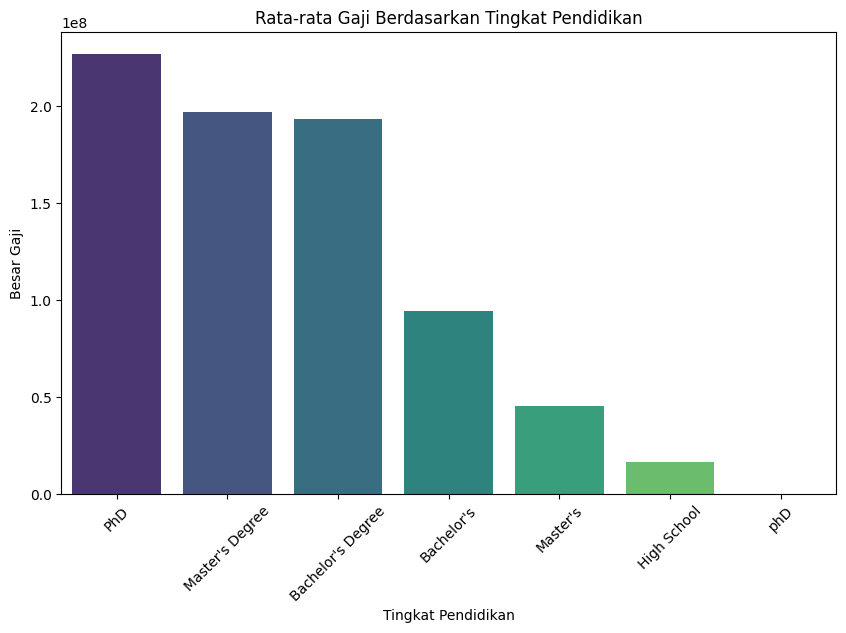

In [ ]:
rata_gaji = df.groupby('Education Level')['Salary'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rata_gaji.index, y=rata_gaji.values, palette='viridis', hue=rata_gaji.index, legend=False)
plt.title('Rata-rata Gaji Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Besar Gaji')
plt.xticks(rotation=45)
plt.show()

Output visual yang ditampilkan untuk perbandingan rata-rata gaji berdasarkan tingkat pendidikan berbentuk sebuah bar chart. Variabel X adalah Tingkat Pendidikan dan Variabel Y adalah Besar Gaji.

Dapat dilihat dari gambar bahwa PhD (S3) memiliki rata-rata gaji tertinggi dibandingkan tingkat pendidikan lainnya, yang kemudian disusul oleh Master’s Degree (S2) dan Bachelor’s Degree (S1) dengan nilai yang berdekatan. Sementara itu, tingkat pendidikan High School (SMA) memiliki rata-rata gaji paling rendah.

Secara umum, grafik ini menunjukkan adanya kecenderungan bahwa semakin tinggi tingkat pendidikan, semakin tinggi pula rata-rata gaji yang diterima.

Namun, di bar chart juga terdapat kategori pendidikan yang terduplikat ("PhD" dan "phD", "Master's Degree" dan "Master's", "Bachelor's Degree" dan "Bachelor's"), maka sebaiknya dilakukan pembersihan data agar nilai perbandingan lebih akurat.

##**Composition (Komposisi)**

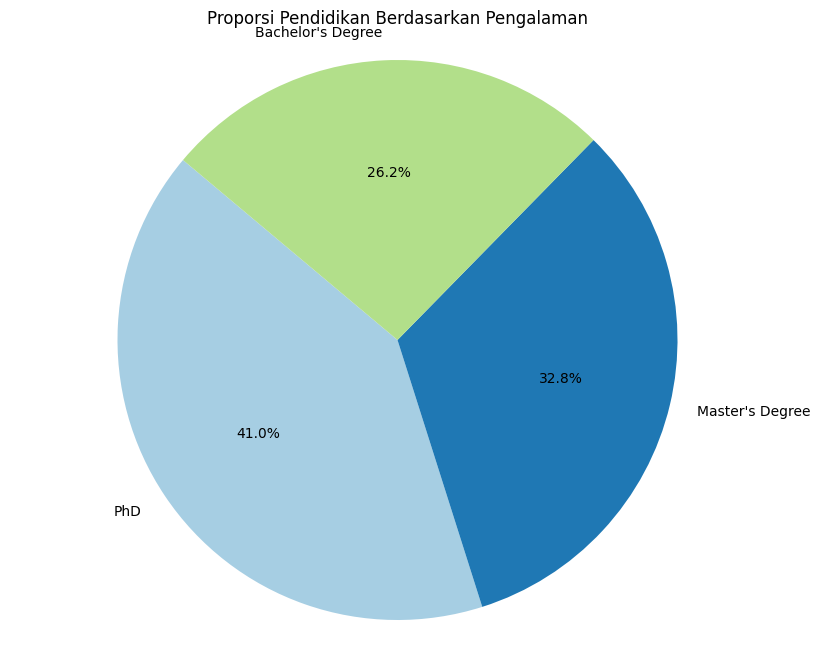

In [ ]:
education_by_experience = df.groupby('Education Level')['Years of Experience'].sum().sort_values(ascending=False)
education_by_experience_top3 = education_by_experience.head(3)

plt.figure(figsize=(10, 8))
education_by_experience_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi Pendidikan Berdasarkan Pengalaman')
plt.ylabel('')
plt.axis('equal')
plt.show()

Output visual yang ditampilkan untuk menggambarkan proporsi kontribusi pengalaman kerja dari masing-masing tingkat pendidikan berbentuk sebuah pie chart.

Dapat dilihat bahwa individu dengan pendidikan PhD memiliki rata-rata pengalaman kerja yang lebih lama/banyak dibandingkan Master's atau Bachelor's. Hal ini kemungkinan karena posisi yang mensyaratkan pendidikan tinggi biasanya ditempati oleh karyawan senior.

##**Distribution (Distribusi)**

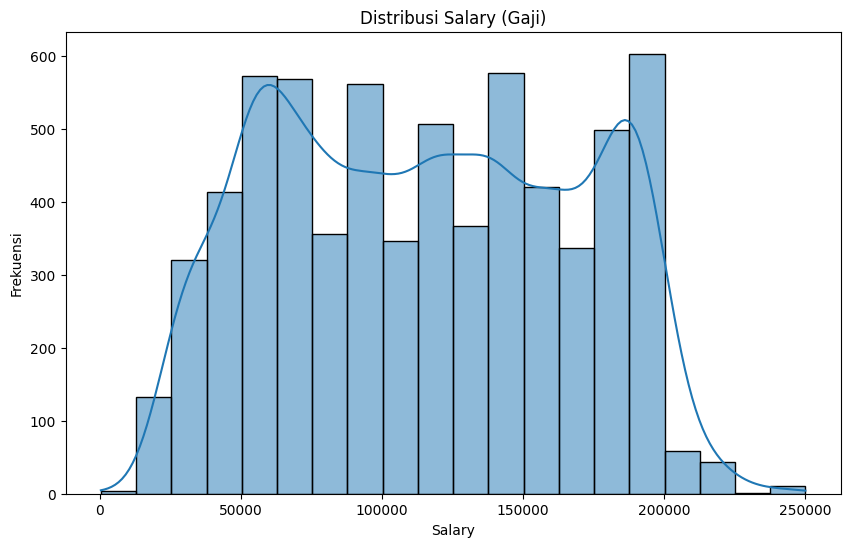

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribusi Salary (Gaji)')
plt.xlabel('Salary')
plt.ylabel('Frekuensi')
plt.show()

Output visual yang ditampilkan untuk menggambarkan distribusi gaji berbentuk sebuah graph histogram. Variabel X adalah Gaji dan variabel Y adalah Frekuensi.

Dapat terlihat dari visual graphnya, sebagian besar karyawan memiliki gaji pada kisaran menengah (50.000–150.000), dengan beberapa nilai tinggi yang menunjukkan adanya posisi dengan kompensasi lebih besar. Distribusi cenderung sedikit skew ke kanan karena adanya gaji tinggi sebagai outlier.

##**Relationship (Hubungan)**

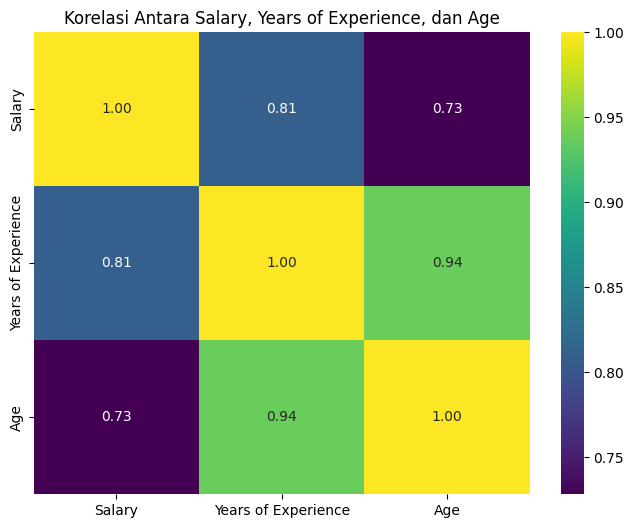

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Salary', 'Years of Experience', 'Age']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi Antara Salary, Years of Experience, dan Age')
plt.show()

Output visual yang ditampilkan untuk menggambarkan hubungan antara gaji, pengalaman kerja, dan umur berbentuk sebuah Heatmap.

Terdapat korelasi positif yang kuat antara Salary dan Years of Experience (0.81), menunjukkan bahwa pengalaman kerja merupakan faktor utama yang memengaruhi kenaikan gaji. Sementara itu, usia juga memiliki hubungan positif dengan gaji (0.73), namun pengaruhnya lebih kecil dibandingkan pengalaman kerja.

Korelasi antara usia dan pengalaman kerja sangat tinggi (0.94). Kedua variabel ini saling berkaitan karena bertambahnya usia biasanya diikuti peningkatan pengalaman kerja.